<a href="https://colab.research.google.com/github/aueskinj/Research_Project/blob/main/Data_Analysis_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

In [5]:
data = pd.read_csv('/content/final.csv')

In [6]:
df = pd.DataFrame(data)

In [7]:
print(df.columns)

Index(['Year', 'Health', 'Educ', 'Agric', 'FHC'], dtype='object')


In [8]:
df['year'] = pd.to_datetime(df['Year'], format='%Y').dt.to_period('Y')
df["poverty_alleviated"] = pd.to_numeric(df["FHC"])
df["educ"] = pd.to_numeric(df["Educ"])
df["health"] = pd.to_numeric(df["Health"])
df["agric"] = pd.to_numeric(df["Agric"])

In [9]:
columns = ['Year', 'Health', 'Educ', 'Agric', 'FHC']
df.drop(columns, axis =1, inplace=True)

In [10]:
df

,year,poverty_alleviated,educ,health,agric
0,2013,5056687.892,163000.00,32595.8,1230612.14
1,2014,5280763.215,284164.89,49781.7,1273735.81
2,2015,5502924.270,294931.16,34654.6,1418755.50
3,2016,5802420.900,315578.67,56606.0,1521434.00
4,2017,6143842.979,412372.29,61841.3,1647572.17
5,2018,6423359.212,455079.84,76684.0,1692413.04
6,2019,6779860.642,464692.19,104158.8,1826800.85
7,2020,6675495.228,472376.00,90800.3,1982642.70
8,2021,7093574.431,511917.00,88189.3,2017973.52
9,2022,7524305.451,548249.67,117360.0,2085104.41


# Decriptive Analytics

In [2]:
def Describe(x):
  # Display basic descriptive statistics
  desc_stats = df.describe()
  #data distribution
  skewness = df.skew()
  kurtosis = df.kurt()

  # Display additional statistics, e.g., median and interquartile range (IQR)
  median = df.median()
  iqr = df.quantile(0.75) - df.quantile(0.25)

  result = pd.concat([desc_stats, skewness, kurtosis, median, iqr], keys=['Descriptive Stats', 'Skewness', 'Kurtosis', 'Median', 'IQR'])

  print(result)

  # Plotting a histogram
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True, color='blue')
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [11]:
df.describe()

,poverty_alleviated,educ,health,agric
count,1.000000e+01,10.000000,10.000000,1.000000e+01
mean,6.228323e+06,392236.171000,71267.180000,1.669704e+06
std,8.134807e+05,122140.188627,28877.191099,3.076824e+05
min,5.056688e+06,163000.000000,32595.800000,1.230612e+06
25%,5.577798e+06,300093.037500,51487.775000,1.444425e+06
50%,6.283601e+06,433726.065000,69262.650000,1.669993e+06
75%,6.753769e+06,470455.047500,90147.550000,1.943682e+06
max,7.524305e+06,548249.670000,117360.000000,2.085104e+06


In [13]:
df.skew()

<ipython-input-13-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


poverty_alleviated    0.043961
educ                 -0.611095
health                0.145059
agric                -0.082773
dtype: float64

In [14]:
df.kurt(0)

<ipython-input-14-3c16f4afdef4>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt(0)


poverty_alleviated   -1.091841
educ                 -0.510523
health               -1.133757
agric                -1.395192
dtype: float64

## Correlation

In [18]:
corr_matrix = df.corr()
corr_matrix.to_csv('correlation_matrix.csv', index=True)

<ipython-input-18-ca1699254104>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


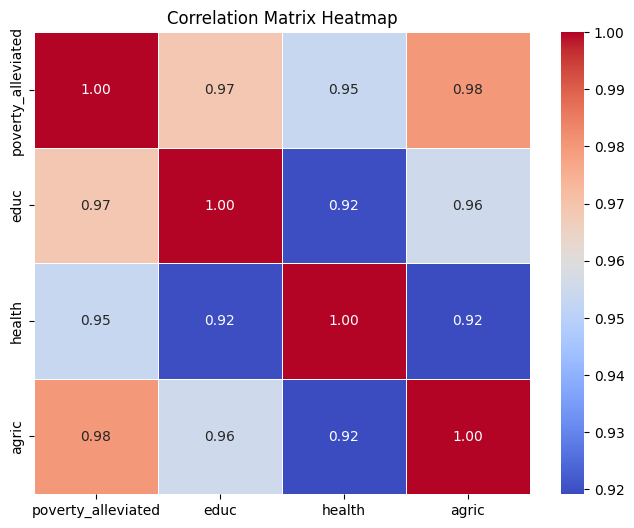

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Regression Analysis

In [30]:
X = sm.add_constant(df[['health', 'educ', 'agric']])
y = df['poverty_alleviated']

# Fit the model
model = sm.OLS(y, X).fit()

#save regression results
results = model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


`Saving TO txt file`

In [24]:
with open('ols_model_summary.txt', 'w') as file:
    file.write(results.as_text())

### ANOVA model

In [31]:
from statsmodels.formula.api import ols

# Assuming df is your DataFrame
model = ols('poverty_alleviated ~ educ + agric + health', data=df).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model)
print(anova_result)


           df        sum_sq       mean_sq           F    PR(>F)
educ      1.0  5.589779e+12  5.589779e+12  324.623413  0.000002
agric     1.0  2.014618e+11  2.014618e+11   11.699786  0.014135
health    1.0  6.120106e+10  6.120106e+10    3.554219  0.108361
Residual  6.0  1.033156e+11  1.721927e+10         NaN       NaN


In [26]:
anova_result.to_csv('anova.csv', index=True)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif_results = calculate_vif(X)

In [33]:
vif_results

,Variable,VIF
0,const,104.016184
1,health,7.376768
2,educ,13.144088
3,agric,13.089513


In [27]:
log_X = np.log(X)

In [28]:
y = df['poverty_alleviated']

# Fit the model
model = sm.OLS(y, log_X).fit()

# Print the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     poverty_alleviated   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              883.6
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                    2.18e-09
Time:                        15:04:56   Log-Likelihood:                         -141.01
No. Observations:                  10   AIC:                                      288.0
Df Residuals:                       7   BIC:                                      288.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


### log transformed data

In [ ]:
with open('ols_model_log.txt', 'w') as file:
    file.write(model.summary().as_text())

In [35]:
def reg_analysis(y, x):
  model = sm.OLS(y, x).fit()
  print(model.summary())

  y_pred = model.predict(x)
  plt.plot(x, y_pred, label='Line Plot')
  plt.scatter(x, y, color='red', label='Scatter Plot')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title('line Plot vs Scatter plot')

  # Add a legend
  plt.legend()

  # Show the plot
  plt.show()

## Education

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:     poverty_alleviated   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              303.6
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                    3.05e-08
Time:                        15:15:21   Log-Likelihood:                         -152.97
No. Observations:                  10   AIC:                                      307.9
Df Residuals:                       9   BIC:                                      308.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

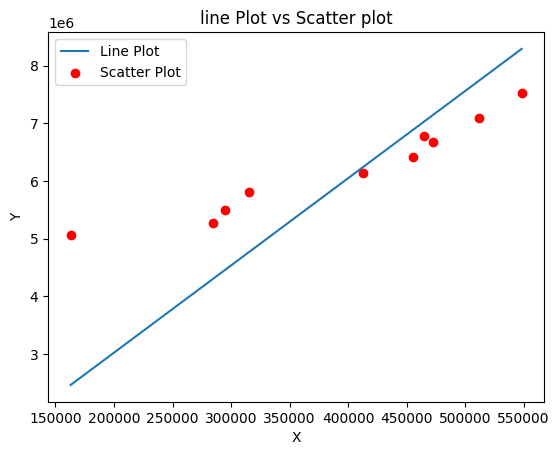

In [36]:
reg_analysis(y, df['educ'])

## Agriculture

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:     poverty_alleviated   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2697.
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                    1.83e-12
Time:                        08:18:10   Log-Likelihood:                         -142.18
No. Observations:                  10   AIC:                                      286.4
Df Residuals:                       9   BIC:                                      286.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

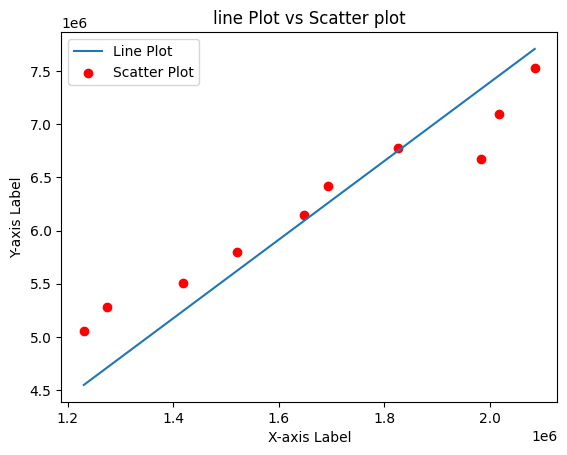

In [19]:
reg_analysis(y, df['agric'])

## Health

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:     poverty_alleviated   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              135.7
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                    9.92e-07
Time:                        15:15:31   Log-Likelihood:                         -156.83
No. Observations:                  10   AIC:                                      315.7
Df Residuals:                       9   BIC:                                      316.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

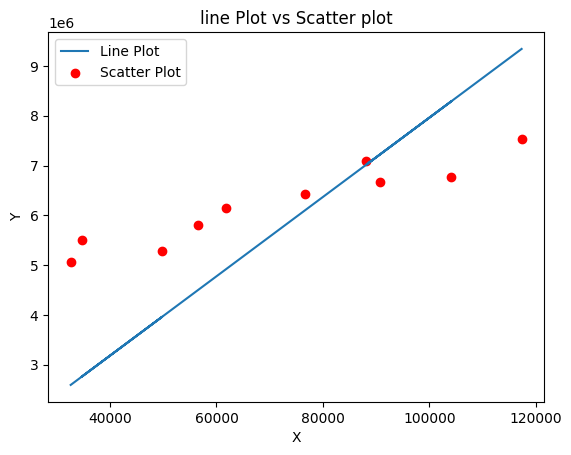

In [37]:
reg_analysis(y, df['health'])

## Time Series Analysis

In [38]:
new_df = df.set_index('year')

In [39]:
new_df.columns

Index(['poverty_alleviated', 'educ', 'health', 'agric'], dtype='object')

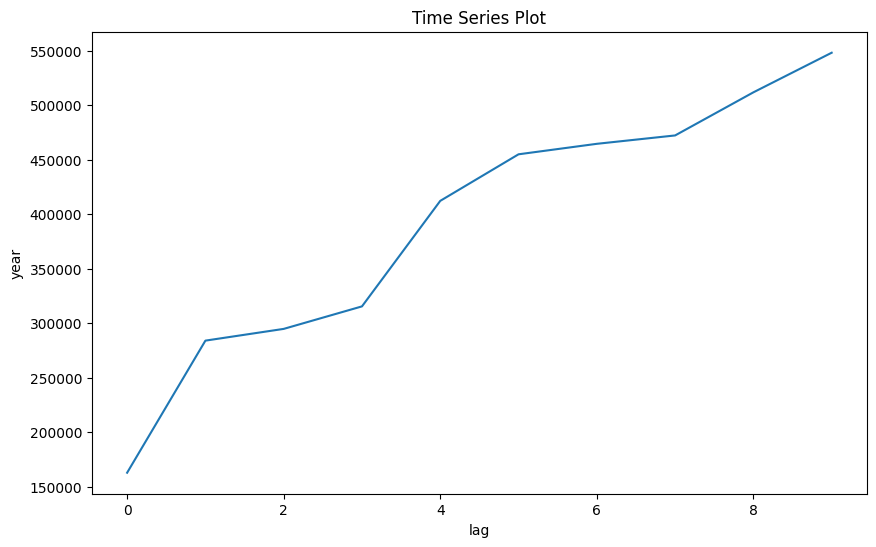

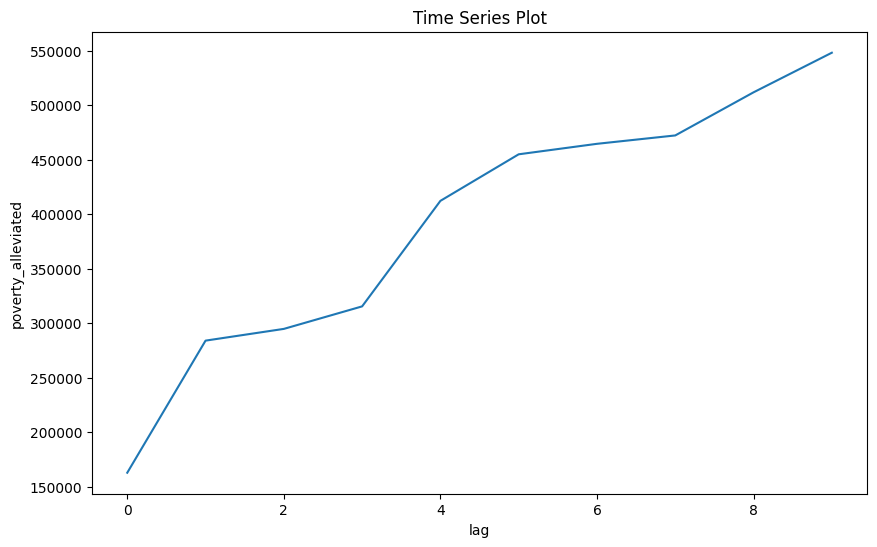

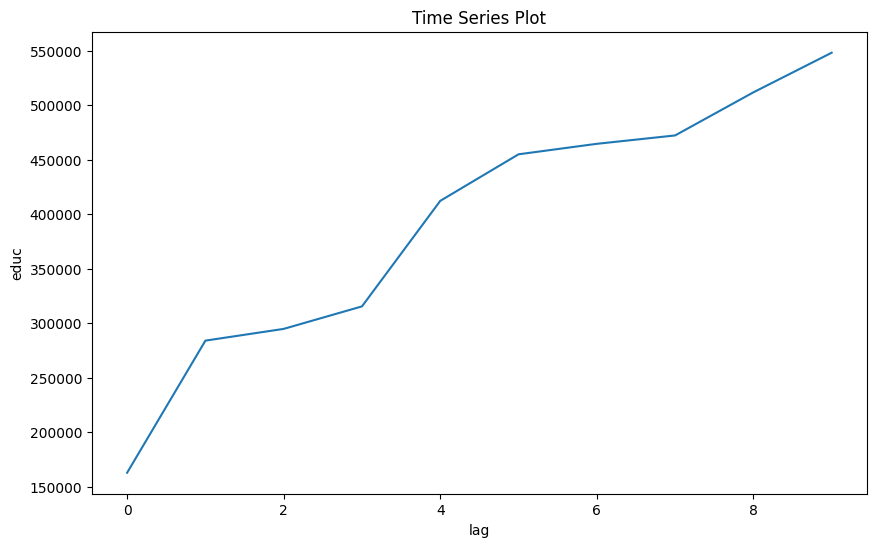

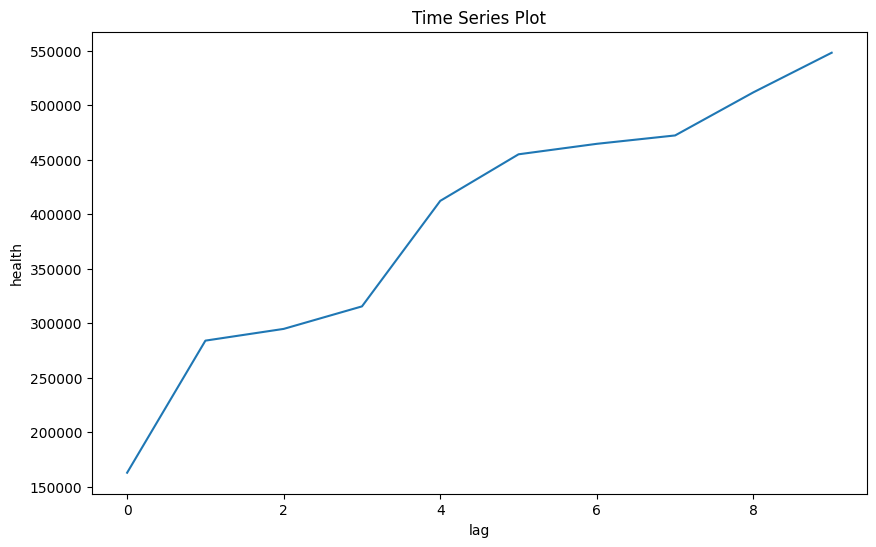

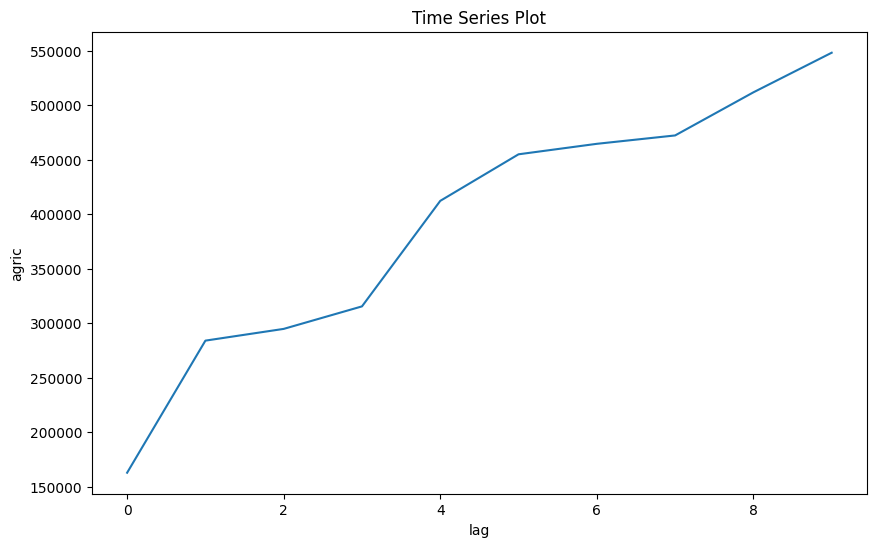

In [48]:
for column in df.columns:
  plt.figure(figsize=(10, 6))
  plt.plot(df['educ'])
  plt.title('Time Series Plot')
  plt.xlabel('lag')
  plt.ylabel(column)
  plt.show()

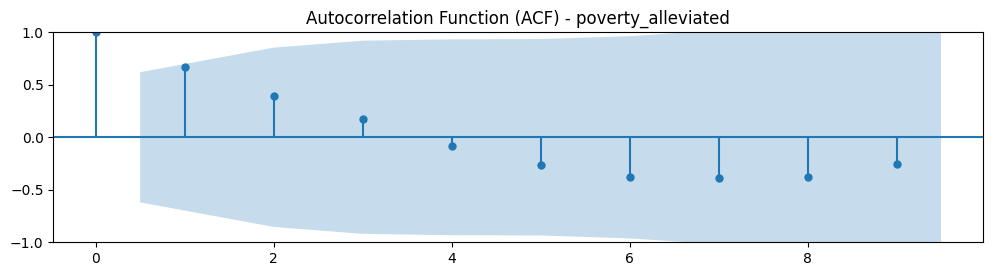

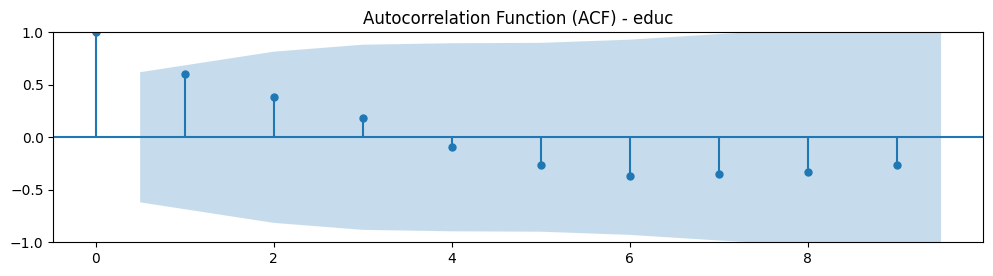

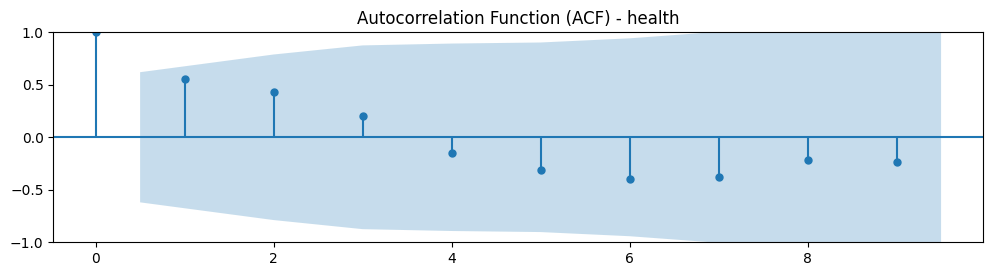

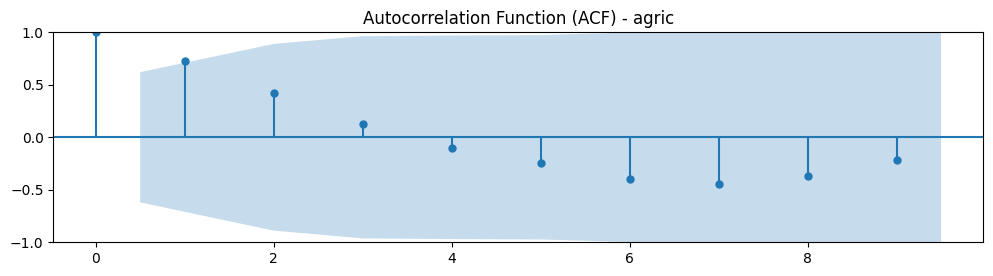

In [54]:
for column in new_df.columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plot_acf(new_df[column], lags=9, ax=plt.gca())
    plt.title(f'Autocorrelation Function (ACF) - {column}')

    plt.show()

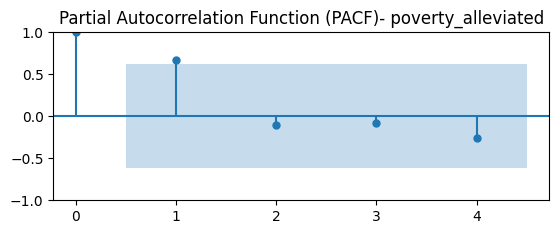

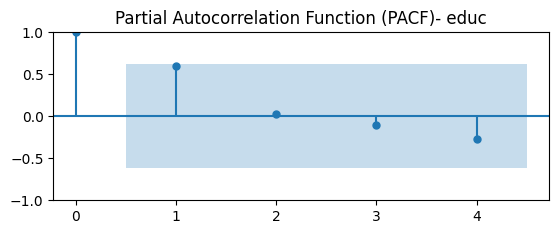

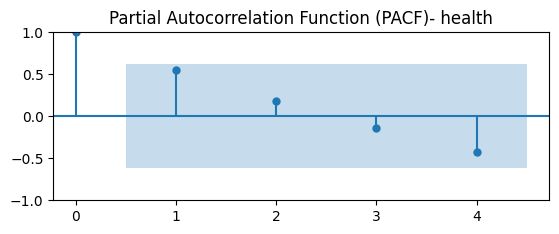

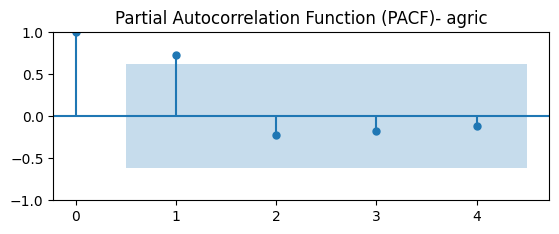

In [56]:
for column in new_df.columns:
  plt.subplot(2, 1, 2)
  plot_pacf(df[column], lags=4, ax=plt.gca())
  plt.title(f'Partial Autocorrelation Function (PACF)- {column}')

  plt.show()